In [2]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Importiere die notwendigen Bibliotheken
from tabulate import tabulate

In [4]:
# Directory you want to retrieve files from
target_directory = '/Users/mxhbmn/Desktop/12. Semester/IM_Challenge/Data/Results_Flexi_MIP'
os.chdir(target_directory)

data_list = []
data = pd.DataFrame(columns = ["cohort", "day", "num_tasks", "profit", "gap", "time", "constraint", "variable"])
for cohort in [7]: 
    for day in [2,5,8,10]: 
        for num_tasks in [50,200,500,1000]: 
        
            endstring = "_" + str(day) + "_1_" + str(num_tasks) + ".txt"

            with open(file = target_directory+"/solution"+endstring) as file: 
                first_line = [float(item) for item in file.readline().strip().split("\t")]

                if (day == 5) and (num_tasks == 500):
                    profit = 0
                    gap = np.inf
                else: 
                    profit = first_line[0]
                    gap = first_line[1]
                
                if gap == np.inf: 
                    gap = 1
                time = first_line[2]
                constraint = first_line[3]
                variable = first_line[4]

                data_list.append([cohort,day,num_tasks,profit,gap,time,constraint,variable])
                #print(cohort,day,num_tasks,profit,gap,time,constraint,variable)

data = pd.DataFrame(data_list,columns = ["Cohorts", "Day", "Num_Tasks", "Profit", "Gap", "Time", "Constraint", "Variable"])

In [12]:
data

,Cohorts,Day,Num_Tasks,Profit,Gap,Time,Constraint,Variable
0,7,2,50,103.0,0.009709,1.72,38524.0,37842.0
1,7,2,200,447.0,0.006711,190.76,574174.0,571242.0
2,7,2,500,701.0,0.383738,10803.68,3535474.0,3528042.0
3,7,2,1000,764.0,0.540576,10813.86,14070974.0,14056042.0
4,7,5,50,104.0,0.000000,7.46,96232.0,94605.0
5,7,5,200,447.0,0.006711,232.22,1435132.0,1428105.0
6,7,5,500,0.0,1.000000,10804.16,8837932.0,8820105.0
7,7,5,1000,0.0,1.000000,10868.42,35175932.0,35140105.0
8,7,8,50,104.0,0.000000,11.42,153940.0,151368.0
9,7,8,200,448.0,0.004464,458.20,2296090.0,2284968.0


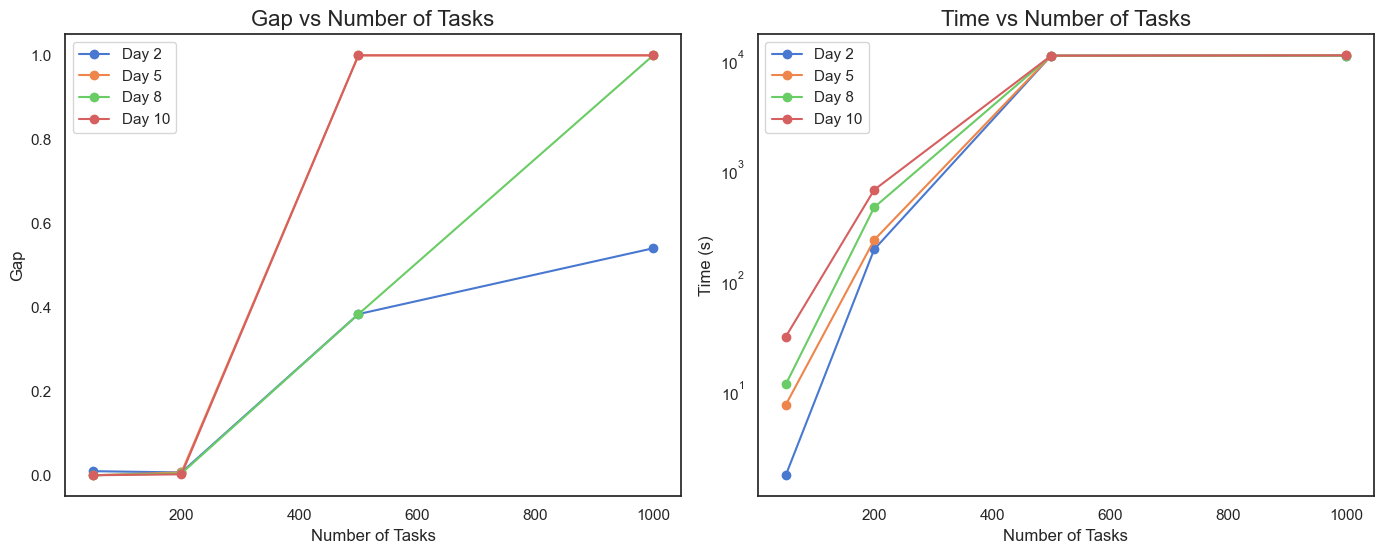

In [10]:
# Assuming 'data' is your DataFrame with 'Day', 'Num_Tasks', 'Gap', and 'Time' columns
# and 'df' is used for other purposes.

# Set global plot style to serif font and seaborn whitegrid
plt.rcParams["font.family"] = "serif"
sns.set(style="white")

# Unique days for plotting
days = data['Day'].unique()

# Create a figure for the plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Consistent color palette for both subplots
palette = sns.color_palette("muted", len(days))

# Subplot 1: Gap vs Num_Tasks
for idx, day in enumerate(days):
    subset = data[data['Day'] == day]
    axes[0].plot(subset['Num_Tasks'], subset['Gap'], marker='o', label=f'Day {day}', color=palette[idx])
axes[0].set_title('Gap vs Number of Tasks', fontsize=16)
axes[0].set_xlabel('Number of Tasks', fontsize=12)
axes[0].set_ylabel('Gap', fontsize=12)
axes[0].legend()

# Subplot 2: Time vs Num_Tasks
for idx, day in enumerate(days):
    subset = data[data['Day'] == day]
    axes[1].plot(subset['Num_Tasks'], subset['Time'], marker='o', label=f'Day {day}', color=palette[idx])
axes[1].set_yscale('log')
axes[1].set_title('Time vs Number of Tasks', fontsize=16)
axes[1].set_xlabel('Number of Tasks', fontsize=12)
axes[1].set_ylabel('Time (s)', fontsize=12)
axes[1].legend()

# Adjust layout for tightness
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the plot as a PNG file
plt.savefig('results_flexi.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


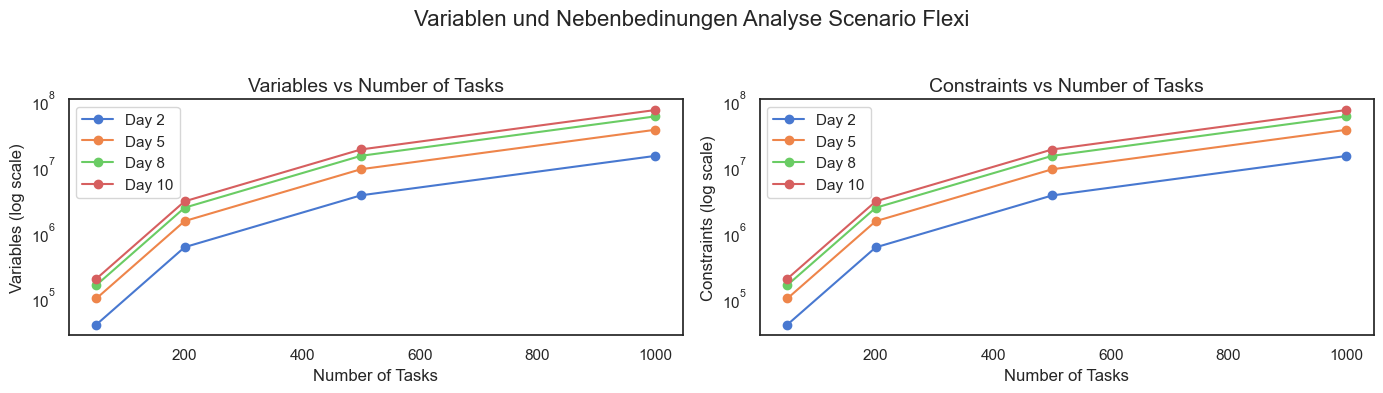

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set Seaborn style to "whitegrid" and font to serif for consistency
plt.rcParams["font.family"] = "serif"
sns.set(style="white")

# Unique days for plotting
days = data['Day'].unique()

# Create a figure with 2 subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Consistent color palette for both subplots
palette = sns.color_palette("muted", len(days))

# Set overall title
fig.suptitle('Variablen und Nebenbedinungen Analyse Scenario Flexi', fontsize=16)

# Subplot 1: Variables vs Num_Tasks
for idx, day in enumerate(days):
    subset = data[data['Day'] == day]
    axes[0].plot(subset['Num_Tasks'], subset['Variable'], marker='o', label=f'Day {day}', color=palette[idx])
axes[0].set_yscale('log')
axes[0].set_title('Variables vs Number of Tasks', fontsize=14)
axes[0].set_xlabel('Number of Tasks', fontsize=12)
axes[0].set_ylabel('Variables (log scale)', fontsize=12)
axes[0].legend()

# Subplot 2: Constraints vs Num_Tasks
for idx, day in enumerate(days):
    subset = data[data['Day'] == day]
    axes[1].plot(subset['Num_Tasks'], subset['Constraint'], marker='o', label=f'Day {day}', color=palette[idx])
axes[1].set_yscale('log')
axes[1].set_title('Constraints vs Number of Tasks', fontsize=14)
axes[1].set_xlabel('Number of Tasks', fontsize=12)
axes[1].set_ylabel('Constraints (log scale)', fontsize=12)
axes[1].legend()

# Adjust the layout for better spacing and aesthetics
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the plot as a PNG file
plt.savefig('results_flexi_constraints_variables.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
